In [3]:
import numpy as np
import matplotlib.pyplot as plt

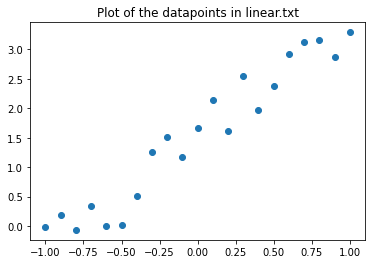

In [4]:
linear = np.genfromtxt('linear.txt')
linear = linear[1:]
plt.title('Plot of the datapoints in linear.txt')
plt.scatter(linear[:, 0], linear[:, 1])

Total loss =  1.9958563274383365
Learned (w*):  [1.78849364 1.52927291]


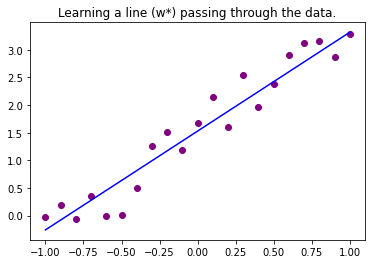

In [5]:
#1
def linear_regression(data, alpha, iterations):
  w = np.random.uniform(-1, 1, 2)
  for i in range(iterations):
    der = np.array([0, 0])
    x = data[:, 0]
    y = data[:, 1]
    der[0] = 2 * np.sum(x * (w[0] * x + w[1] - y))
    der[1] = 2 * np.sum(w[0] * x + w[1] - y)
    w -= alpha * der
  return w

def loss(data, w):
  L = 0
  for i in range(data.shape[0]):
    x, y = data[i][:]
    L += (w[0] * x + w[1] - y) ** 2
  return L

w = linear_regression(linear, 0.001, 1000)
print('Total loss = ', loss(linear, w))
x = np.linspace(-1, 1, 100)
plt.title('Learning a line (w*) passing through the data.')
plt.scatter(linear[:, 0], linear[:, 1], color = 'purple')
plt.plot(x, w[0] * x + w[1], color = 'blue')
print('Learned (w*): ', w)

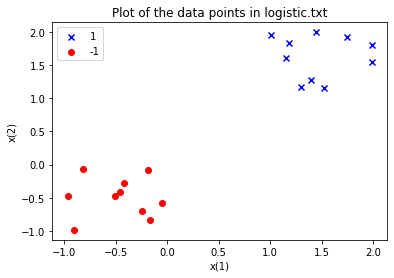

In [6]:
logistic = np.genfromtxt('logistic.txt')
logistic = logistic[1:]
plt.title('Plot of the data points in logistic.txt')
plt.xlabel('x(1)')
plt.ylabel('x(2)')
plt.scatter(logistic[: 10, 0], logistic[: 10, 1], c = 'blue', marker = 'x', label = '1')
plt.scatter(logistic[10 :, 0], logistic[10 :, 1], c = 'red', marker = 'o', label = '-1')
plt.legend()

Learned w* [ 6.75626776  7.66788487 -5.15209961]


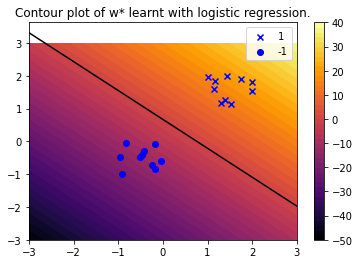

In [7]:
#2
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

np.set_printoptions(suppress = True)

def logistic_regression(data, alpha, iterations):
  w = np.random.uniform(-1, 1, 3)
  x1 = data[:, 0]
  x2 = data[:, 1]
  y  = data[:, 2]
  for i in range(iterations):
    der = np.array([0, 0, 0], dtype = np.float64)
    c = sigmoid(np.multiply(-y, (w[0] * x1 + w[1] * x2 + w[2])))
    der[0] = np.sum(np.multiply(c, np.multiply(y, x1)))
    der[1] = np.sum(np.multiply(c, np.multiply(y, x2)))
    der[2] = np.sum(np.multiply(c, y))
    w += alpha * der
  return w
  
w = np.random.uniform(-1, 1, 3)

w = logistic_regression(logistic, 0.5, 2000)

print('Learned w*', w)

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)

x_1, x_2 = np.meshgrid(x1, x2)

plt.title('Contour plot of w* learnt with logistic regression.')
plt.contourf(x_1, x_2, w[0] * x_1 + w[1] * x_2 + w[2], 50, cmap = 'inferno')
plt.colorbar()
plt.plot(x1, -1 / w[1] * (w[0] * x1 + w[2]), c = 'black')
plt.scatter(logistic[: 10, 0], logistic[: 10, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(logistic[10 :, 0], logistic[10 :, 1], c = 'b', marker = 'o', label = '-1')
plt.legend()

11493376/11490434 [==============================] - 0s 0us/step


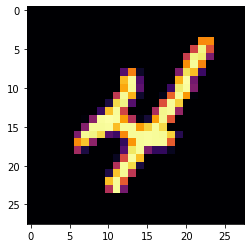

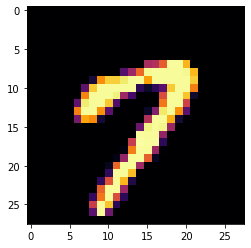

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

plt.imshow(X_train[9], cmap = plt.get_cmap('inferno'))
plt.show()
plt.imshow(X_train[15], cmap = plt.get_cmap('inferno'))
plt.show()

#Modifying the training and test data sets to only include digits 4 and 7.
xtrain = []
ytrain = []

xtest = []
ytest = []

for i in range(Y_train.shape[0]):
  if (Y_train[i] == 4 or Y_train[i] == 7):
    xtrain.append(X_train[i].flatten())
    ytrain.append(1 if Y_train[i] == 4 else -1)

for i in range(Y_test.shape[0]):
  if (Y_test[i] == 4 or Y_test[i] == 7):
    xtest.append(X_test[i].flatten())
    ytest.append(1 if Y_test[i] == 4 else -1)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

xtest = np.array(xtest)
ytest = np.array(ytest)

In [ ]:
def mnist_regression(xtrain, ytrain, alpha, iterations):
  w = np.random.uniform(-0.1, 0.1, 785)
  for i in range(iterations):
    der = np.zeros(785)
    c = w[-1]
    for i in range(784):
      c += w[i] * xtrain[:, i]
    c = sigmoid(np.multiply(-ytrain, c))
    for i in range(784):
      der[i] = np.sum(np.multiply(c, np.multiply(ytrain, xtrain[:, i])))
    der[-1] = np.sum(np.multiply(c, ytrain))
    w += alpha * der
  return w

w = mnist_regression(xtrain, ytrain, 0.001, 100)

def test_accuracy(w, xtest, ytest):
  correct = 0
  for i in range(xtest.shape[0]):
    z = w[-1]
    for j in range(784):
      z += w[j] * xtest[i][j]
    if (z * ytest[i] > 0):
      correct += 1
  print('Accuracy on the test set = ', correct / ytest.shape[0])

test_accuracy(w, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on the test set =  0.9880597014925373
